In [1]:
import pandas as pd
data = pd.read_csv("../A3/SVMdataset.csv")
data.head(5)

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [2]:
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]
# y = target values, last column of the data frame
Y = data.iloc[:, -1]

In [3]:
X

,x1,x2
0,0.107143,0.603070
1,0.093318,0.649854
2,0.097926,0.705409
3,0.155530,0.784357
4,0.210829,0.866228
...,...,...
858,0.994240,0.516667
859,0.964286,0.472807
860,0.975806,0.439474
861,0.989631,0.425439


In [4]:
#transformed x to a matrix form
import numpy as np
X = X.to_numpy()
X

array([[0.107143 , 0.60307  ],
       [0.093318 , 0.649854 ],
       [0.0979263, 0.705409 ],
       ...,
       [0.975806 , 0.439474 ],
       [0.989631 , 0.425439 ],
       [0.996544 , 0.414912 ]])

In [5]:
#scaling
#m = X.size
#data_mean = np.ones_like(X)
#zero-mean
#data_mean = 1/m * np.sum(X, axis = 0)

#X_zero_mean = X - data_mean

#normalization
#Calculate standard deviation
#v = 1/m *  np.sum(X_zero_mean, axis = 0)
#X = X_zero_mean/v
#X

#scaling data
from sklearn.preprocessing import StandardScaler as sc
X = sc().fit_transform(X)

In [6]:
#split data to 60%(training) & 40%(to be splitted to test, validation)
from sklearn.model_selection import train_test_split 
X_train, X_to_be_splitted, Y_train, Y_to_be_splitted = train_test_split(X, Y, test_size = 0.4, random_state = 42)

In [7]:
#splitting the 40%
X_test, X_cross_v, Y_test, Y_cross_v = train_test_split(X_to_be_splitted, Y_to_be_splitted, test_size = 0.5, random_state = 42)

In [8]:
# filter out the positive class
positive = data.loc[Y == 1]

# filter out the negative class
negative = data.loc[Y == 0]

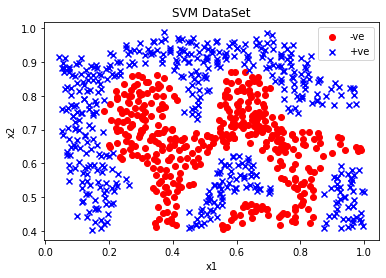

In [9]:
#plotting all of the dataset
import matplotlib.pyplot as plt
plt.scatter(negative.iloc[:, 0], negative.iloc[:, 1], label='0', marker = 'o', color = 'red')
plt.scatter(positive.iloc[:, 0], positive.iloc[:, 1], label='1', marker = 'x', color = 'blue')
plt.title("SVM DataSet")
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

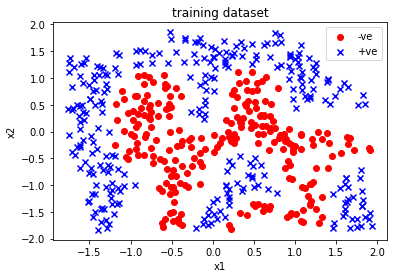

In [10]:
#plotting training data 
from matplotlib.colors import ListedColormap
X_plot, Y_plot = X_train,Y_train
X1, X2 = np.meshgrid(np.arange(start=X_plot[:,0].min(), stop = X_plot[:,0].max(), step=0.25),
                     np.arange(start=X_plot[:,1].min(), stop=X_plot[:,1].max(), step = 0.25))
markers=['o','x']
for i,j in enumerate(np.unique(Y_plot)):
    plt.scatter(X_plot[Y_plot == j,0], X_plot[Y_plot ==j,1], label=j, color=ListedColormap(('red', 'blue'))(i), 
                marker=markers[i])
plt.legend()
plt.title("training dataset")
plt.xlabel("x1")
plt.ylabel("x2")
classes = ["-ve", "+ve"]
plt.legend(labels=classes)
plt.show()

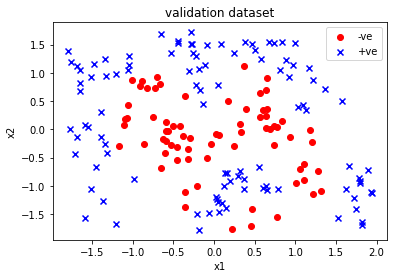

In [11]:
#plotting validation data 
X_plot, Y_plot = X_cross_v,Y_cross_v
X1, X2 = np.meshgrid(np.arange(start=X_plot[:,0].min(), stop = X_plot[:,0].max(), step=0.25),
                    np.arange(start=X_plot[:,1].min(), stop=X_plot[:,1].max(), step = 0.25))
markers=['o','x']
for i,j in enumerate(np.unique(Y_plot)):
    plt.scatter(X_plot[Y_plot == j,0], X_plot[Y_plot ==j,1], label=j,color=ListedColormap(('red', 'blue'))(i),marker=markers[i])
classes = ["-ve", "+ve"]
plt.legend(labels=classes)
plt.title("validation dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

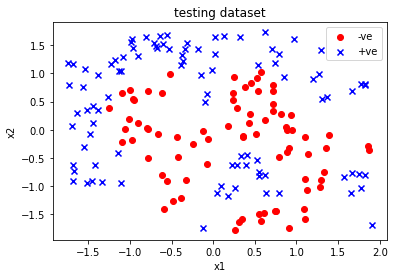

In [12]:
#plotting testing data 
X_plot, Y_plot = X_test,Y_test
X1, X2 = np.meshgrid(np.arange(start=X_plot[:,0].min(), stop = X_plot[:,0].max(), step=0.25),
                     np.arange(start=X_plot[:,1].min(), stop=X_plot[:,1].max(), step = 0.25))
markers=['o','x']
for i,j in enumerate(np.unique(Y_plot)):
    plt.scatter(X_plot[Y_plot == j,0], X_plot[Y_plot ==j,1], label=j,color=ListedColormap(('red', 'blue'))(i), marker=markers[i])
classes = ["-ve", "+ve"]
plt.legend(labels=classes)
plt.title("testing dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [80]:
#finding the best value for C value for linear SVM
from sklearn import svm
from sklearn import metrics #for the F1 score
for i in ([0.1,0.2,0.7,1,2,4,8,16,20,32,40,64,128,1000]):
    lin_svc = svm.LinearSVC(C=i).fit(X_cross_v, Y_cross_v) #validation data
    Y_pred_cross = lin_svc.predict(X_test)
    F1 = metrics.f1_score(Y_test,Y_pred_cross)
    print( "C = ", i, "-> F1 score = ",F1 )
#best C value for linear SVM is 32

C =  0.1 -> F1 score =  0.71875
C =  0.2 -> F1 score =  0.71875
C =  0.7 -> F1 score =  0.71875
C =  1 -> F1 score =  0.71875
C =  2 -> F1 score =  0.71875
C =  4 -> F1 score =  0.71875
C =  8 -> F1 score =  0.71875
C =  16 -> F1 score =  0.71875
C =  20 -> F1 score =  0.7159533073929961
C =  32 -> F1 score =  0.7209302325581395
C =  40 -> F1 score =  0.7035573122529644
C =  64 -> F1 score =  0.6548672566371682
C =  128 -> F1 score =  0.6992481203007519
C =  1000 -> F1 score =  0.5464480874316939


In [74]:
#SVM classifier with linear kernal for training data

lin_svc = svm.LinearSVC(C=32).fit(X_train, Y_train) 


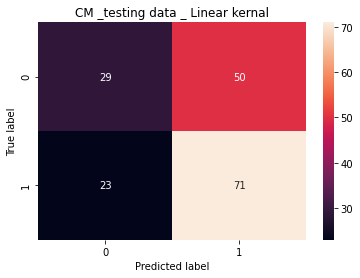

In [17]:
#confusion matrix for testing data (linear kernal)
import seaborn as sn
Y_pred_linear = lin_svc.predict(X_test)
Y_data = {'y_Actual' : Y_test,
         'y_Predicted': Y_pred_linear}
df = pd.DataFrame(Y_data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['True label'], colnames=['Predicted label'])

sn.heatmap(confusion_matrix, annot=True)
plt.title("CM _testing data _ Linear kernal")

plt.show()

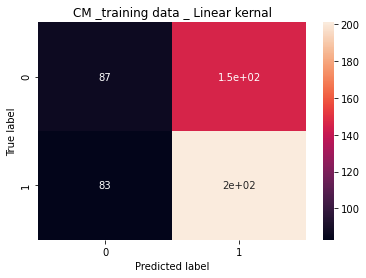

In [18]:
#confusion matrix for training data (linear kernal)
Y_pred_linear = lin_svc.predict(X_train)
Y_data = {'y_Actual' : Y_train,
         'y_Predicted': Y_pred_linear}
df = pd.DataFrame(Y_data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['True label'], colnames=['Predicted label'])

sn.heatmap(confusion_matrix, annot=True)
plt.title("CM _training data _ Linear kernal")

plt.show()

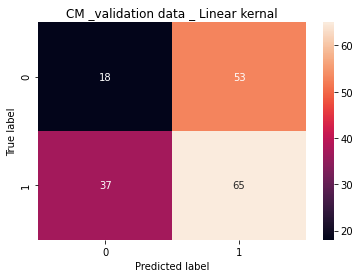

In [19]:
#confusion matrix for cross validation (linear kernal)
Y_pred_linear = lin_svc.predict(X_cross_v)
Y_data = {'y_Actual' : Y_cross_v,
         'y_Predicted': Y_pred_linear}
df = pd.DataFrame(Y_data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['True label'], colnames=['Predicted label'])

sn.heatmap(confusion_matrix, annot=True)
plt.title("CM _validation data _ Linear kernal")

plt.show()

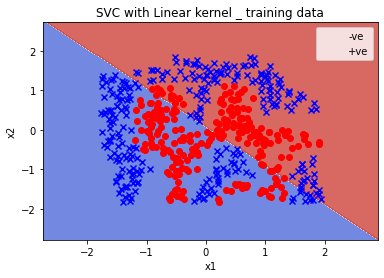

In [85]:
#finding the desicion bounday for the linear SVM (training data)
X1, X2 = np.meshgrid(np.arange(start=X_test[:,0].min()-1, stop = X_test[:,0].max()+1, step=0.02),
                     np.arange(start=X_test[:,1].min()-1, stop=X_test[:,1].max()+1, step = 0.02))
markers=['o','x']

for i, clf in enumerate(np.unique(lin_svc)):
    Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(X1.shape)
    plt.contourf(X1, X2, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
for i,j in enumerate(np.unique(Y_plot)):
    plt.scatter(X_train[Y_train == j,0], X_train[Y_train ==j,1],color=ListedColormap(('red', 'blue'))(i), marker=markers[i])
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVC with Linear kernel _ training data')
classes = ["-ve", "+ve"]
plt.legend(labels=classes)
plt.show()

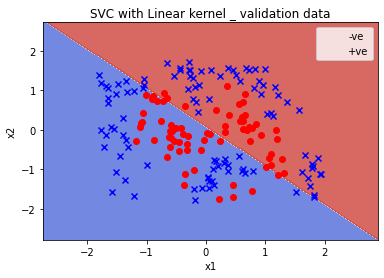

In [88]:
#finding the desicion bounday for the linear SVM (validation data)
X1, X2 = np.meshgrid(np.arange(start=X_test[:,0].min()-1, stop = X_test[:,0].max()+1, step=0.02),
                     np.arange(start=X_test[:,1].min()-1, stop=X_test[:,1].max()+1, step = 0.02))
markers=['o','x']

for i, clf in enumerate(np.unique(lin_svc)):
    Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(X1.shape)
    plt.contourf(X1, X2, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
for i,j in enumerate(np.unique(Y_plot)):
    plt.scatter(X_cross_v[Y_cross_v == j,0], X_cross_v[Y_cross_v ==j,1],color=ListedColormap(('red', 'blue'))(i), marker=markers[i])
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVC with Linear kernel _ validation data')
classes = ["-ve", "+ve"]
plt.legend(labels=classes)
plt.show()

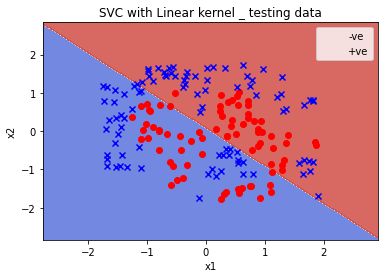

In [89]:
#finding the desicion bounday for the linear SVM (testing data)
X1, X2 = np.meshgrid(np.arange(start=X_train[:,0].min()-1, stop = X_train[:,0].max()+1, step=0.02),
                     np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step = 0.02))
markers=['o','x']

for i, clf in enumerate(np.unique(lin_svc)):
    Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(X1.shape)
    plt.contourf(X1, X2, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
for i,j in enumerate(np.unique(Y_plot)):
    plt.scatter(X_test[Y_test == j,0], X_test[Y_test ==j,1],color=ListedColormap(('red', 'blue'))(i), marker=markers[i])
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVC with Linear kernel _ testing data')
classes = ["-ve", "+ve"]
plt.legend(labels=classes)
plt.show()

In [91]:
#metrics for training dataset - linear kernal

Y_predicit_train = lin_svc.predict(X_train)

accuracy = metrics.accuracy_score(Y_train,Y_predicit_train)
print( "Accuracy = ",accuracy)

percision = metrics.precision_score(Y_train,Y_predicit_train)
print( "Percision = ",percision)

recall = metrics.recall_score(Y_train,Y_predicit_train)
print( "Recall = ",recall)

F1 = metrics.f1_score(Y_train,Y_predicit_train)
print( "F1 score = ",F1)

Accuracy =  0.5183752417794971
Percision =  0.5738396624472574
Recall =  0.4788732394366197
F1 score =  0.5220729366602688


In [92]:
#metrics for validation dataset - linear kernal

Y_predicit_validation = lin_svc.predict(X_cross_v)

accuracy = metrics.accuracy_score(Y_cross_v,Y_predicit_validation)
print( "Accuracy = ",accuracy)

percision = metrics.precision_score(Y_cross_v,Y_predicit_validation)
print( "Percision = ",percision)

recall = metrics.recall_score(Y_cross_v,Y_predicit_validation)
print( "Recall = ",recall)

F1 = metrics.f1_score(Y_cross_v,Y_predicit_validation)
print( "F1 score = ",F1)

Accuracy =  0.5433526011560693
Percision =  0.6419753086419753
Recall =  0.5098039215686274
F1 score =  0.5683060109289617


In [93]:
#metrics for testing dataset - linear kernal

Y_predicit_test = lin_svc.predict(X_test)

accuracy = metrics.accuracy_score(Y_test,Y_predicit_test)
print( "Accuracy = ",accuracy)

percision = metrics.precision_score(Y_test,Y_predicit_test)
print( "Percision = ",percision)

recall = metrics.recall_score(Y_test,Y_predicit_test)
print( "Recall = ",recall)

F1 = metrics.f1_score(Y_test,Y_predicit_test)
print( "F1 score = ",F1)

Accuracy =  0.5202312138728323
Percision =  0.5617977528089888
Recall =  0.5319148936170213
F1 score =  0.5464480874316939


In [94]:
#grid search finding best values for C and gamma; depending on F1 score

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1,0.2,1,2,4,8,16,64,128,1000],
                     'C': [0,0.1,0.2,1,2,4,8,16,32,64,128,1000]}]

scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_cross_v, Y_cross_v)

    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print()

    print("Detailed classification report:")
    print()
    y_true, y_pred = Y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    

# Tuning hyper-parameters for f1

Best parameters set found on development set:
{'C': 2, 'gamma': 4, 'kernel': 'rbf'}

Detailed classification report:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        79
           1       0.96      0.98      0.97        94

    accuracy                           0.97       173
   macro avg       0.97      0.96      0.96       173
weighted avg       0.97      0.97      0.97       173




In [95]:
#SVM classifier with Gaussian kernal rbf
from sklearn import svm
svclassifier = svm.SVC(kernel='rbf', gamma=4,C=2)
svclassifier.fit(X_train, Y_train) 

SVC(C=2, gamma=4)

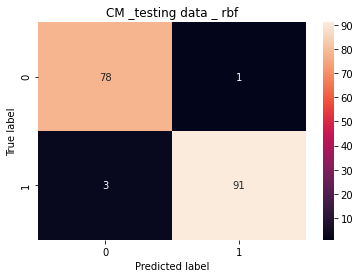

In [31]:
#confusion matrix for testing data (rbf kernal)
Y_pred = svclassifier.predict(X_test)
Y_data = {'y_Actual' : Y_test,
         'y_Predicted': Y_pred}
df = pd.DataFrame(Y_data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['True label'], colnames=['Predicted label'])

sn.heatmap(confusion_matrix, annot=True)
plt.title("CM _testing data _ rbf")

plt.show()

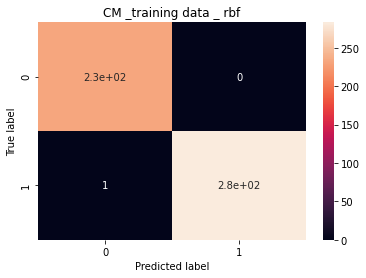

In [32]:
#confusion matrix for training data (rbf kernal)
Y_pred = svclassifier.predict(X_train)
Y_data = {'y_Actual' : Y_train,
         'y_Predicted': Y_pred}
df = pd.DataFrame(Y_data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['True label'], colnames=['Predicted label'])

sn.heatmap(confusion_matrix, annot=True)
plt.title("CM _training data _ rbf")

plt.show()

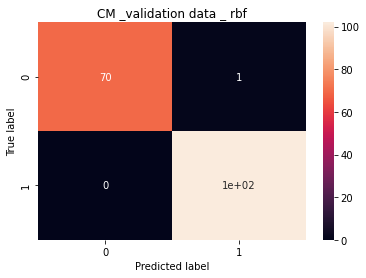

In [33]:
#confusion matrix for validation data (rbf kernal)
Y_pred = svclassifier.predict(X_cross_v)
Y_data = {'y_Actual' : Y_cross_v,
         'y_Predicted': Y_pred}
df = pd.DataFrame(Y_data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['True label'], colnames=['Predicted label'])

sn.heatmap(confusion_matrix, annot=True)
plt.title("CM _validation data _ rbf")

plt.show()

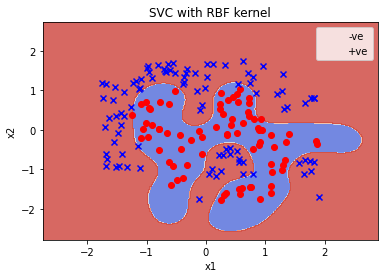

In [97]:
#model with testing data
X1, X2 = np.meshgrid(np.arange(start=X_test[:,0].min()-1, stop = X_test[:,0].max()+1, step=0.02),
                     np.arange(start=X_test[:,1].min()-1, stop=X_test[:,1].max()+1, step = 0.02))
markers=['o','x']

for i, clf in enumerate(np.unique(svclassifier)):
    Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(X1.shape)
    plt.contourf(X1, X2, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
for i,j in enumerate(np.unique(Y_plot)):
    plt.scatter(X_test[Y_test == j,0], X_test[Y_test ==j,1],color=ListedColormap(('red', 'blue'))(i), marker=markers[i])
    
plt.xlabel('x1')
plt.ylabel('x2')
classes = ["-ve", "+ve"]
plt.legend(labels=classes)
plt.title('SVC with RBF kernel')

plt.show()

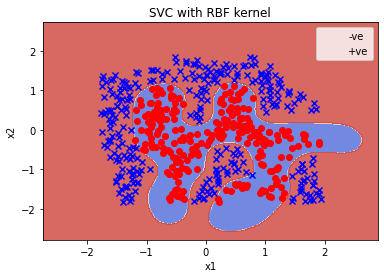

In [98]:
#model with training data
X1, X2 = np.meshgrid(np.arange(start=X_test[:,0].min()-1, stop = X_test[:,0].max()+1, step=0.02),
                     np.arange(start=X_test[:,1].min()-1, stop=X_test[:,1].max()+1, step = 0.02))
markers=['o','x']

for i, clf in enumerate(np.unique(svclassifier)):
    Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(X1.shape)
    plt.contourf(X1, X2, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
for i,j in enumerate(np.unique(Y_plot)):
    plt.scatter(X_train[Y_train == j,0], X_train[Y_train ==j,1],color=ListedColormap(('red', 'blue'))(i), marker=markers[i])
    
plt.xlabel('x1')
plt.ylabel('x2')
classes = ["-ve", "+ve"]
plt.legend(labels=classes)
plt.title('SVC with RBF kernel')

plt.show()

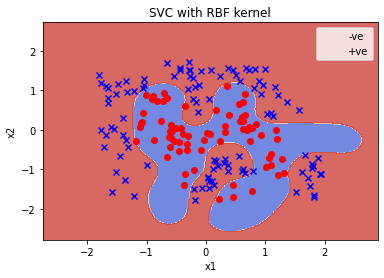

In [99]:
#model with validation data
X1, X2 = np.meshgrid(np.arange(start=X_test[:,0].min()-1, stop = X_test[:,0].max()+1, step=0.02),
                     np.arange(start=X_test[:,1].min()-1, stop=X_test[:,1].max()+1, step = 0.02))
markers=['o','x']

for i, clf in enumerate(np.unique(svclassifier)):
    Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(X1.shape)
    plt.contourf(X1, X2, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
for i,j in enumerate(np.unique(Y_plot)):
    plt.scatter(X_cross_v[Y_cross_v == j,0], X_cross_v[Y_cross_v ==j,1],color=ListedColormap(('red', 'blue'))(i), marker=markers[i])
    
plt.xlabel('x1')
plt.ylabel('x2')
classes = ["-ve", "+ve"]
plt.legend(labels=classes)
plt.title('SVC with RBF kernel')

plt.show()

In [100]:
#metrics for training dataset - rbf kernal

Y_predicit_train = svclassifier.predict(X_train)

accuracy = metrics.accuracy_score(Y_train,Y_predicit_train)
print( "Accuracy = ",accuracy)

percision = metrics.precision_score(Y_train,Y_predicit_train)
print( "Percision = ",percision)

recall = metrics.recall_score(Y_train,Y_predicit_train)
print( "Recall = ",recall)

F1 = metrics.f1_score(Y_train,Y_predicit_train)
print( "F1 score = ",F1)

Accuracy =  0.9980657640232108
Percision =  1.0
Recall =  0.9964788732394366
F1 score =  0.998236331569665


In [101]:
#metrics for validation dataset - rbf kernal

Y_predicit_validation = svclassifier.predict(X_cross_v)

accuracy = metrics.accuracy_score(Y_cross_v,Y_predicit_validation)
print( "Accuracy = ",accuracy)

percision = metrics.precision_score(Y_cross_v,Y_predicit_validation)
print( "Percision = ",percision)

recall = metrics.recall_score(Y_cross_v,Y_predicit_validation)
print( "Recall = ",recall)

F1 = metrics.f1_score(Y_cross_v,Y_predicit_validation)
print( "F1 score = ",F1)

Accuracy =  0.9942196531791907
Percision =  0.9902912621359223
Recall =  1.0
F1 score =  0.9951219512195122


In [102]:
#metrics for testing dataset - rbf kernal

Y_predicit_test = svclassifier.predict(X_test)

accuracy = metrics.accuracy_score(Y_test,Y_predicit_test)
print( "Accuracy = ",accuracy)

percision = metrics.precision_score(Y_test,Y_predicit_test)
print( "Percision = ",percision)

recall = metrics.recall_score(Y_test,Y_predicit_test)
print( "Recall = ",recall)

F1 = metrics.f1_score(Y_test,Y_predicit_test)
print( "F1 score = ",F1)

Accuracy =  0.976878612716763
Percision =  0.9891304347826086
Recall =  0.9680851063829787
F1 score =  0.9784946236559139
